In [365]:
import pandas as pd
import re
import numpy as np 
import pandas as pd 
import datetime
import calendar as cal
import matplotlib.pyplot as plt


In [366]:
# data set from kaggle 
# need to understand discover  teh data for each file
# need to see record count, type an dnormlize
# null value

In [367]:
dc_calender = pd.read_csv('../data/calendar.csv')
dl_listings = pd.read_csv('../data/listings.csv')
dr_reviews = pd.read_csv('../data/reviews.csv')


dc_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [368]:
dc_calender.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [369]:

dl_listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [370]:
dl_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [371]:
#Missing Value

In [372]:
calendar_no_nulls = set(dc_calender .columns[dc_calender .isnull().mean()==0])
calendar_no_nulls

{'available', 'date', 'listing_id'}

In [373]:
listings_no_nulls = set(dl_listings .columns[dl_listings .isnull().mean()==0])
listings_no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [374]:
reviews_no_nulls = set(dr_reviews.columns[dr_reviews.isnull().mean()==0])
reviews_no_nulls

{'date', 'id', 'listing_id', 'reviewer_id', 'reviewer_name'}

In [375]:
#Data Cleaning Functions

In [376]:
# Coverting Price as string into Float
def float_price(df,column):
    """ 
        This function will cast numerical columns that are currently
        strings and that have ',' in the thousand position 
        and return a new list with the values cast as float
    """
    
    price_without_dot = [(p.replace(",","")) if type(p) != float else p for p in df[column]]
    #[(p.replace(",","")) for p in df[column]]
    new_price = [float(p[1:]) if type(p) != float else p for p in price_without_dot]
    #[float(p[1:]) for p in price_without_dot]
    return new_price

In [377]:
#How much revenue do Airbnb hosts make?

In [378]:
# Transform string with the price value into a float

dl_listings['price'] = float_price(dl_listings,'price')
dl_listings['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [379]:
# Group Listing by host
host_gb = dl_listings.groupby(by=['host_id'], dropna=False).mean().reset_index()
host_gb[['host_id','price']]

,host_id,price
0,4193,79.5
1,6207,89.0
2,8021,85.0
3,8993,48.0
4,11775,70.0
...,...,...
2746,52990042,26.0
2747,53050379,20.0
2748,53065829,120.0
2749,53169216,40.0


In [380]:
# Check price feature data type in the calendar dataframe
type(dc_calender['price'][1]) == float

False

In [381]:
# Transform string with the price value into a float
dc_calender['price'] = float_price(dc_calender,'price')

dc_calender['price']

0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64

In [382]:
# Copy calendar datframe into a new one and drop rows with dates where available equals f
calendar_avg = dc_calender.copy()
calendar_avg.drop(calendar_avg[calendar_avg.available == 'f'].index, inplace=True)

In [383]:
# Get number of days being analysis
number_day_calendar = len(dc_calender.date.unique())

In [384]:
# Gruop by listing_id and then the average price per day earn by each listing
calendar_avg = calendar_avg.groupby(by=['listing_id'], dropna=False).sum().reset_index()
calendar_avg['avg_price_day'] = [round(p/number_day_calendar,2) for p in calendar_avg['price']]
calendar_avg.head()

,listing_id,price,avg_price_day
0,3335,37080.0,101.59
1,4291,29930.0,82.00
2,5682,16669.0,45.67
3,6606,33890.0,92.85
4,7369,4505.0,12.34


In [385]:
# Get the columns that will be used in the merge of calendar and listing dataframe
filter_col_listings = [c for c in dl_listings.columns if c != 'price']

In [386]:
# Merge both dataframes and order then by host_id
merge_list_cal = pd.merge(calendar_avg, dl_listings[filter_col_listings], left_on=['listing_id'], right_on=['id'])
avg_per_host_prop = merge_list_cal[['host_id','listing_id','price','avg_price_day']].sort_values(by='host_id')
avg_per_host_prop.index = [i for i in range(len(avg_per_host_prop))]
avg_per_host_prop.head()

,host_id,listing_id,price,avg_price_day
0,4193,3335,37080.0,101.59
1,4193,7745016,6250.0,17.12
2,4193,6117473,17520.0,48.00
3,4193,1263470,18700.0,51.23
4,6207,1707064,67225.0,184.18


In [387]:
# Group by host_id in order to get how many properties has each host
listing_per_host = pd.DataFrame(avg_per_host_prop.groupby('host_id')['host_id'].count())
listing_per_host.columns = ['number_of_listings']
listing_per_host = listing_per_host.reset_index()

In [388]:
# Get average earnings by day for each host
avg_per_host = avg_per_host_prop[['host_id','price','avg_price_day']]
avg_per_host = avg_per_host.groupby(by=['host_id'], dropna=False).mean().reset_index()
avg_per_host.sort_values(by='price')
avg_per_host.head()

,host_id,price,avg_price_day
0,4193,19887.5,54.485
1,6207,67225.0,184.180
2,8021,17052.5,46.720
3,8993,16669.0,45.670
4,11775,26070.0,71.420


In [389]:
#Visualizations

<AxesSubplot:xlabel='number_of_listings'>

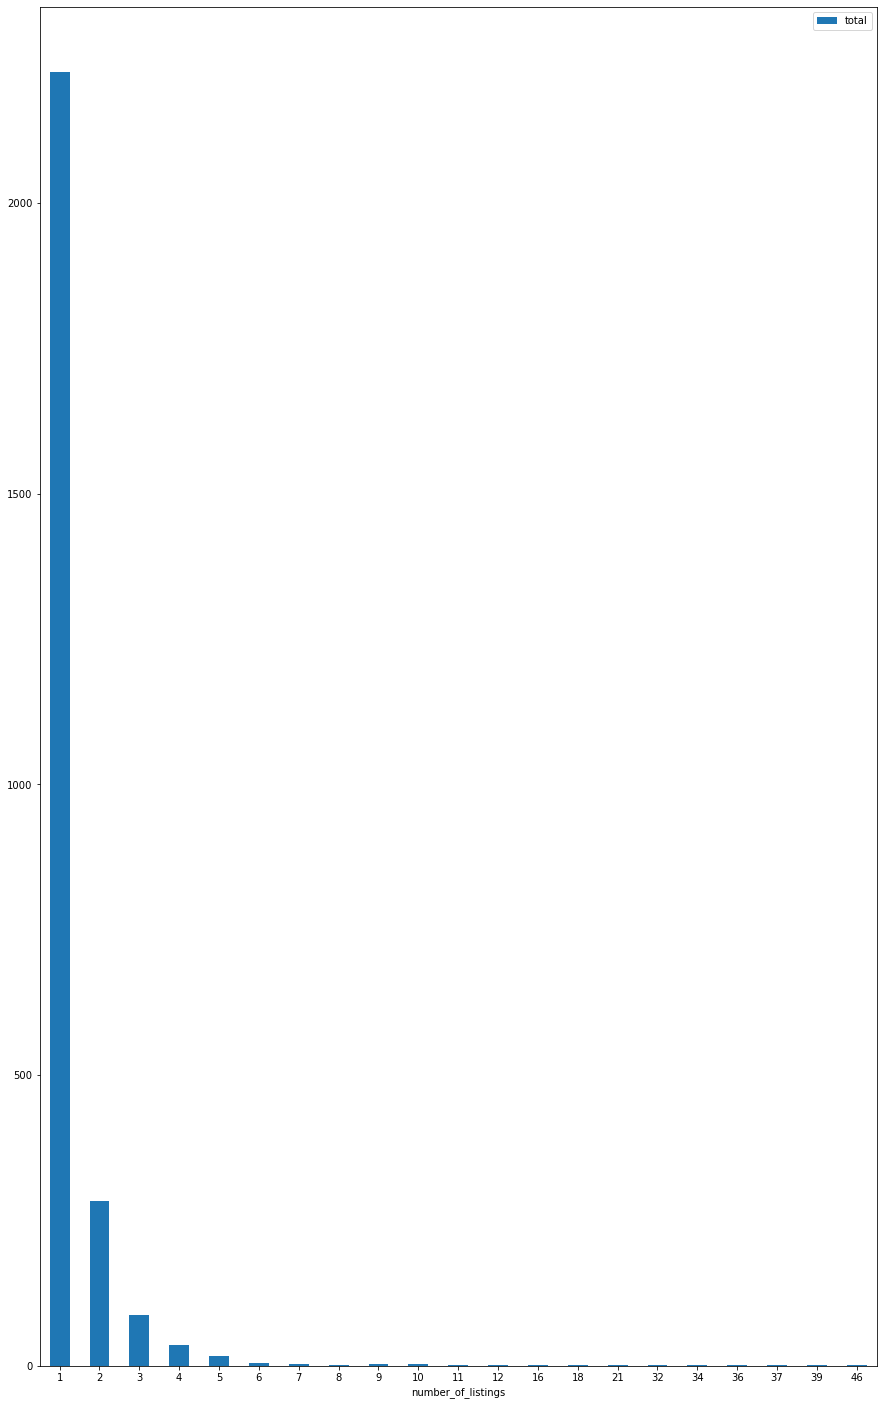

In [390]:
# Get how many host has how many properties.
# Then let show that in a bar char
pro_num_total = pd.DataFrame(listing_per_host.groupby('number_of_listings')['host_id'].count()).reset_index()
pro_num_total = pro_num_total.rename(columns={'host_id': 'total'})
pro_num_total.plot.bar(x='number_of_listings', y='total', rot=0, figsize=(15,25))

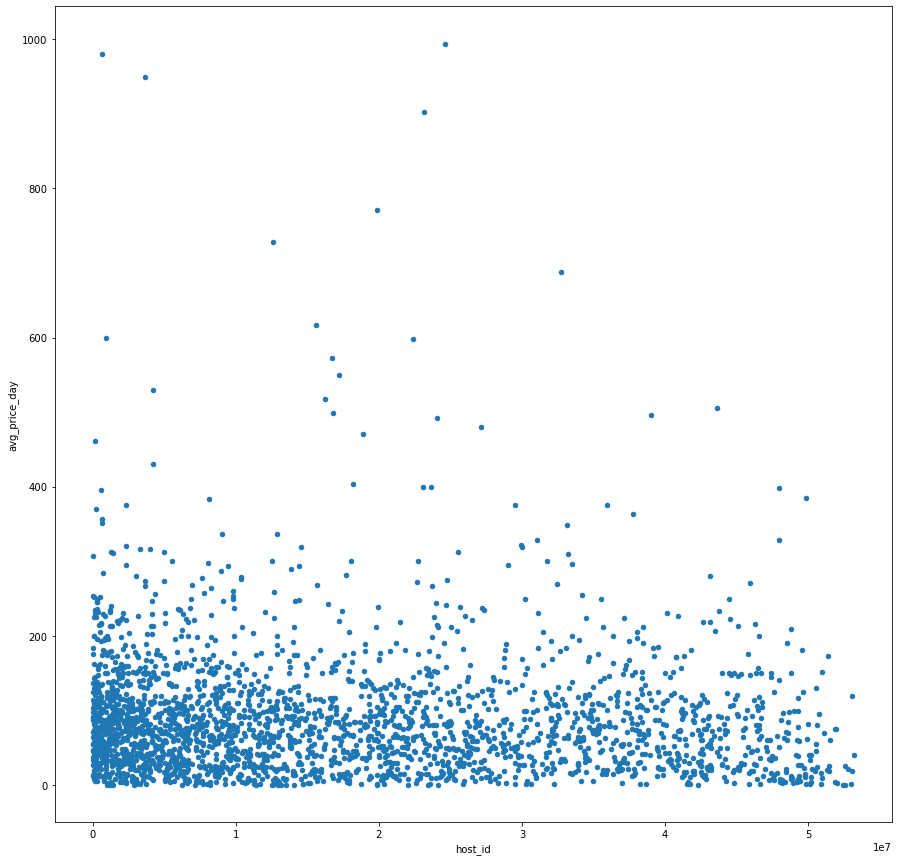

In [391]:
# Scatter plot of earning per day
ax = avg_per_host.plot.scatter(x='host_id', y='avg_price_day', rot=0, figsize=(15,15))

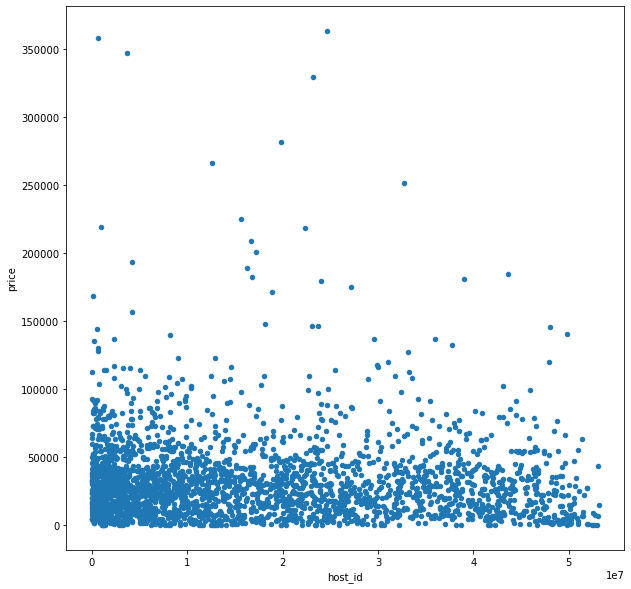

In [392]:
# Scatter plot of total earnings
ax = avg_per_host.plot.scatter(x='host_id', y='price', rot=0, figsize=(10,10))

In [393]:
# Get correlation between features in avg_per_host dataframe
df_corr = pd.merge(avg_per_host, listing_per_host, on='host_id')
corr_data = df_corr.corr()
corr_data

,host_id,price,avg_price_day,number_of_listings
host_id,1.000000,-0.059223,-0.059224,-0.082173
price,-0.059223,1.000000,1.000000,0.052810
avg_price_day,-0.059224,1.000000,1.000000,0.052810
number_of_listings,-0.082173,0.052810,0.052810,1.000000


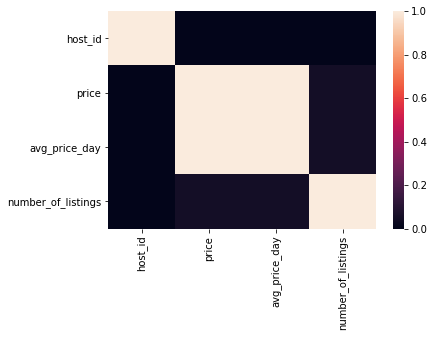

In [394]:
#Heatmap of correlation
ax = sns.heatmap(corr_data, vmin=0, vmax=1)

In [395]:
#When is the best time to rent?

In [396]:
# Generate dictionary with name of each month given the number

complet_calendar = dc_calender.copy()
month_name = {index: month for index, month in enumerate(cal.month_abbr) if month}
month_numb = {month: index for index, month in enumerate(cal.month_abbr) if month}
complet_calendar['month'] = [month_name[int(d[5:7])] for d in complet_calendar['date']]
complet_calendar['is_rent'] = [1 if r == 't' else 0 for r in complet_calendar['available']]

In [397]:
complet_calendar.head()

,listing_id,date,available,price,month,is_rent
0,241032,2016-01-04,t,85.0,Jan,1
1,241032,2016-01-05,t,85.0,Jan,1
2,241032,2016-01-06,f,NaN,Jan,0
3,241032,2016-01-07,f,NaN,Jan,0
4,241032,2016-01-08,f,NaN,Jan,0


In [398]:
# Generate new dataframe with the average properties rented each month
# and the average price for each month of all the properties available that month
avg_month = complet_calendar.groupby(['month']).mean().reset_index()
avg_month['month_numb'] = [month_numb[m] for m in avg_month['month']]
avg_month = avg_month[['month_numb','month','is_rent','price']].sort_values(by='month_numb')
avg_month.index = avg_month['month_numb']#[i for i in range(len(avg_month))]
avg_month['is_rent'] = [round(r*100,2) for r in avg_month['is_rent']]
avg_month = avg_month.drop(columns=['month_numb','month'])
avg_month

,is_rent,price
month_numb,,
1,56.69,122.912176
2,66.22,124.293927
3,70.92,128.644488
4,66.38,135.097005
5,67.57,139.538183
6,67.44,147.473137
7,62.71,152.094150
8,64.51,150.656594
9,67.44,143.255949


<AxesSubplot:xlabel='month_numb'>

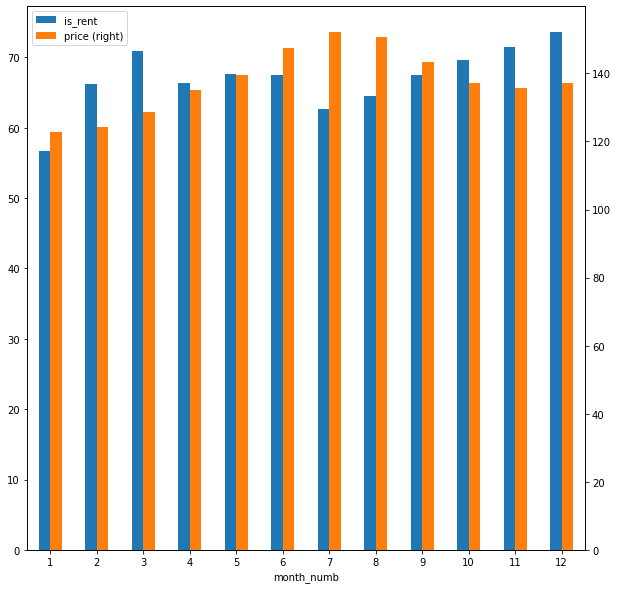

In [399]:
# Bar Graph of how many properties are available to rent and the average price of each month
avg_month.plot.bar(secondary_y='price',rot=0, figsize=(10,10))

In [400]:
#Which are the best areas to rent?

In [401]:
# Remain with only certain columns from listing to analysis better the information
# Drop rows with NaN as wont be available of completing the data
filter_listing = dl_listings[['id','neighbourhood','accommodates','city','price','review_scores_location']]
filter_listing = filter_listing.dropna()
filter_listing.head()

,id,neighbourhood,accommodates,city,price,review_scores_location
0,241032,Queen Anne,4,Seattle,85.0,9.0
1,953595,Queen Anne,4,Seattle,150.0,10.0
2,3308979,Queen Anne,11,Seattle,975.0,10.0
4,278830,Queen Anne,6,Seattle,450.0,9.0
5,5956968,Queen Anne,2,Seattle,120.0,10.0


In [402]:
# Group filter listing by neighbourhood
best_2_rent = filter_listing[['neighbourhood','price','review_scores_location']]
best_2_rent = best_2_rent.groupby('neighbourhood').mean()
best_2_rent.head()

,price,review_scores_location
neighbourhood,,
Alki,179.866667,9.866667
Arbor Heights,118.000000,8.666667
Atlantic,113.604651,9.093023
Ballard,120.289617,9.759563
Belltown,164.752747,9.807692


In [403]:
# As there are many locations to analysis and it gets complicated in a graph
# Take the top 20 and see if I can get to a good conclusion
# with reasonable price-review relationship
best_2_rent_top = best_2_rent.sort_values(by='review_scores_location',ascending=False)[:50]
best_2_rent_top

,price,review_scores_location
neighbourhood,,
Pike Market,92.000000,10.000000
Roxhill,60.000000,10.000000
Gatewood,105.230769,9.923077
Central Business District,161.281690,9.915493
Green Lake,142.261905,9.904762
Pike Place Market,177.774194,9.903226
Lower Queen Anne,145.000000,9.888889
Fauntleroy,173.444444,9.888889
Genesee,119.538462,9.884615


<AxesSubplot:xlabel='neighbourhood'>

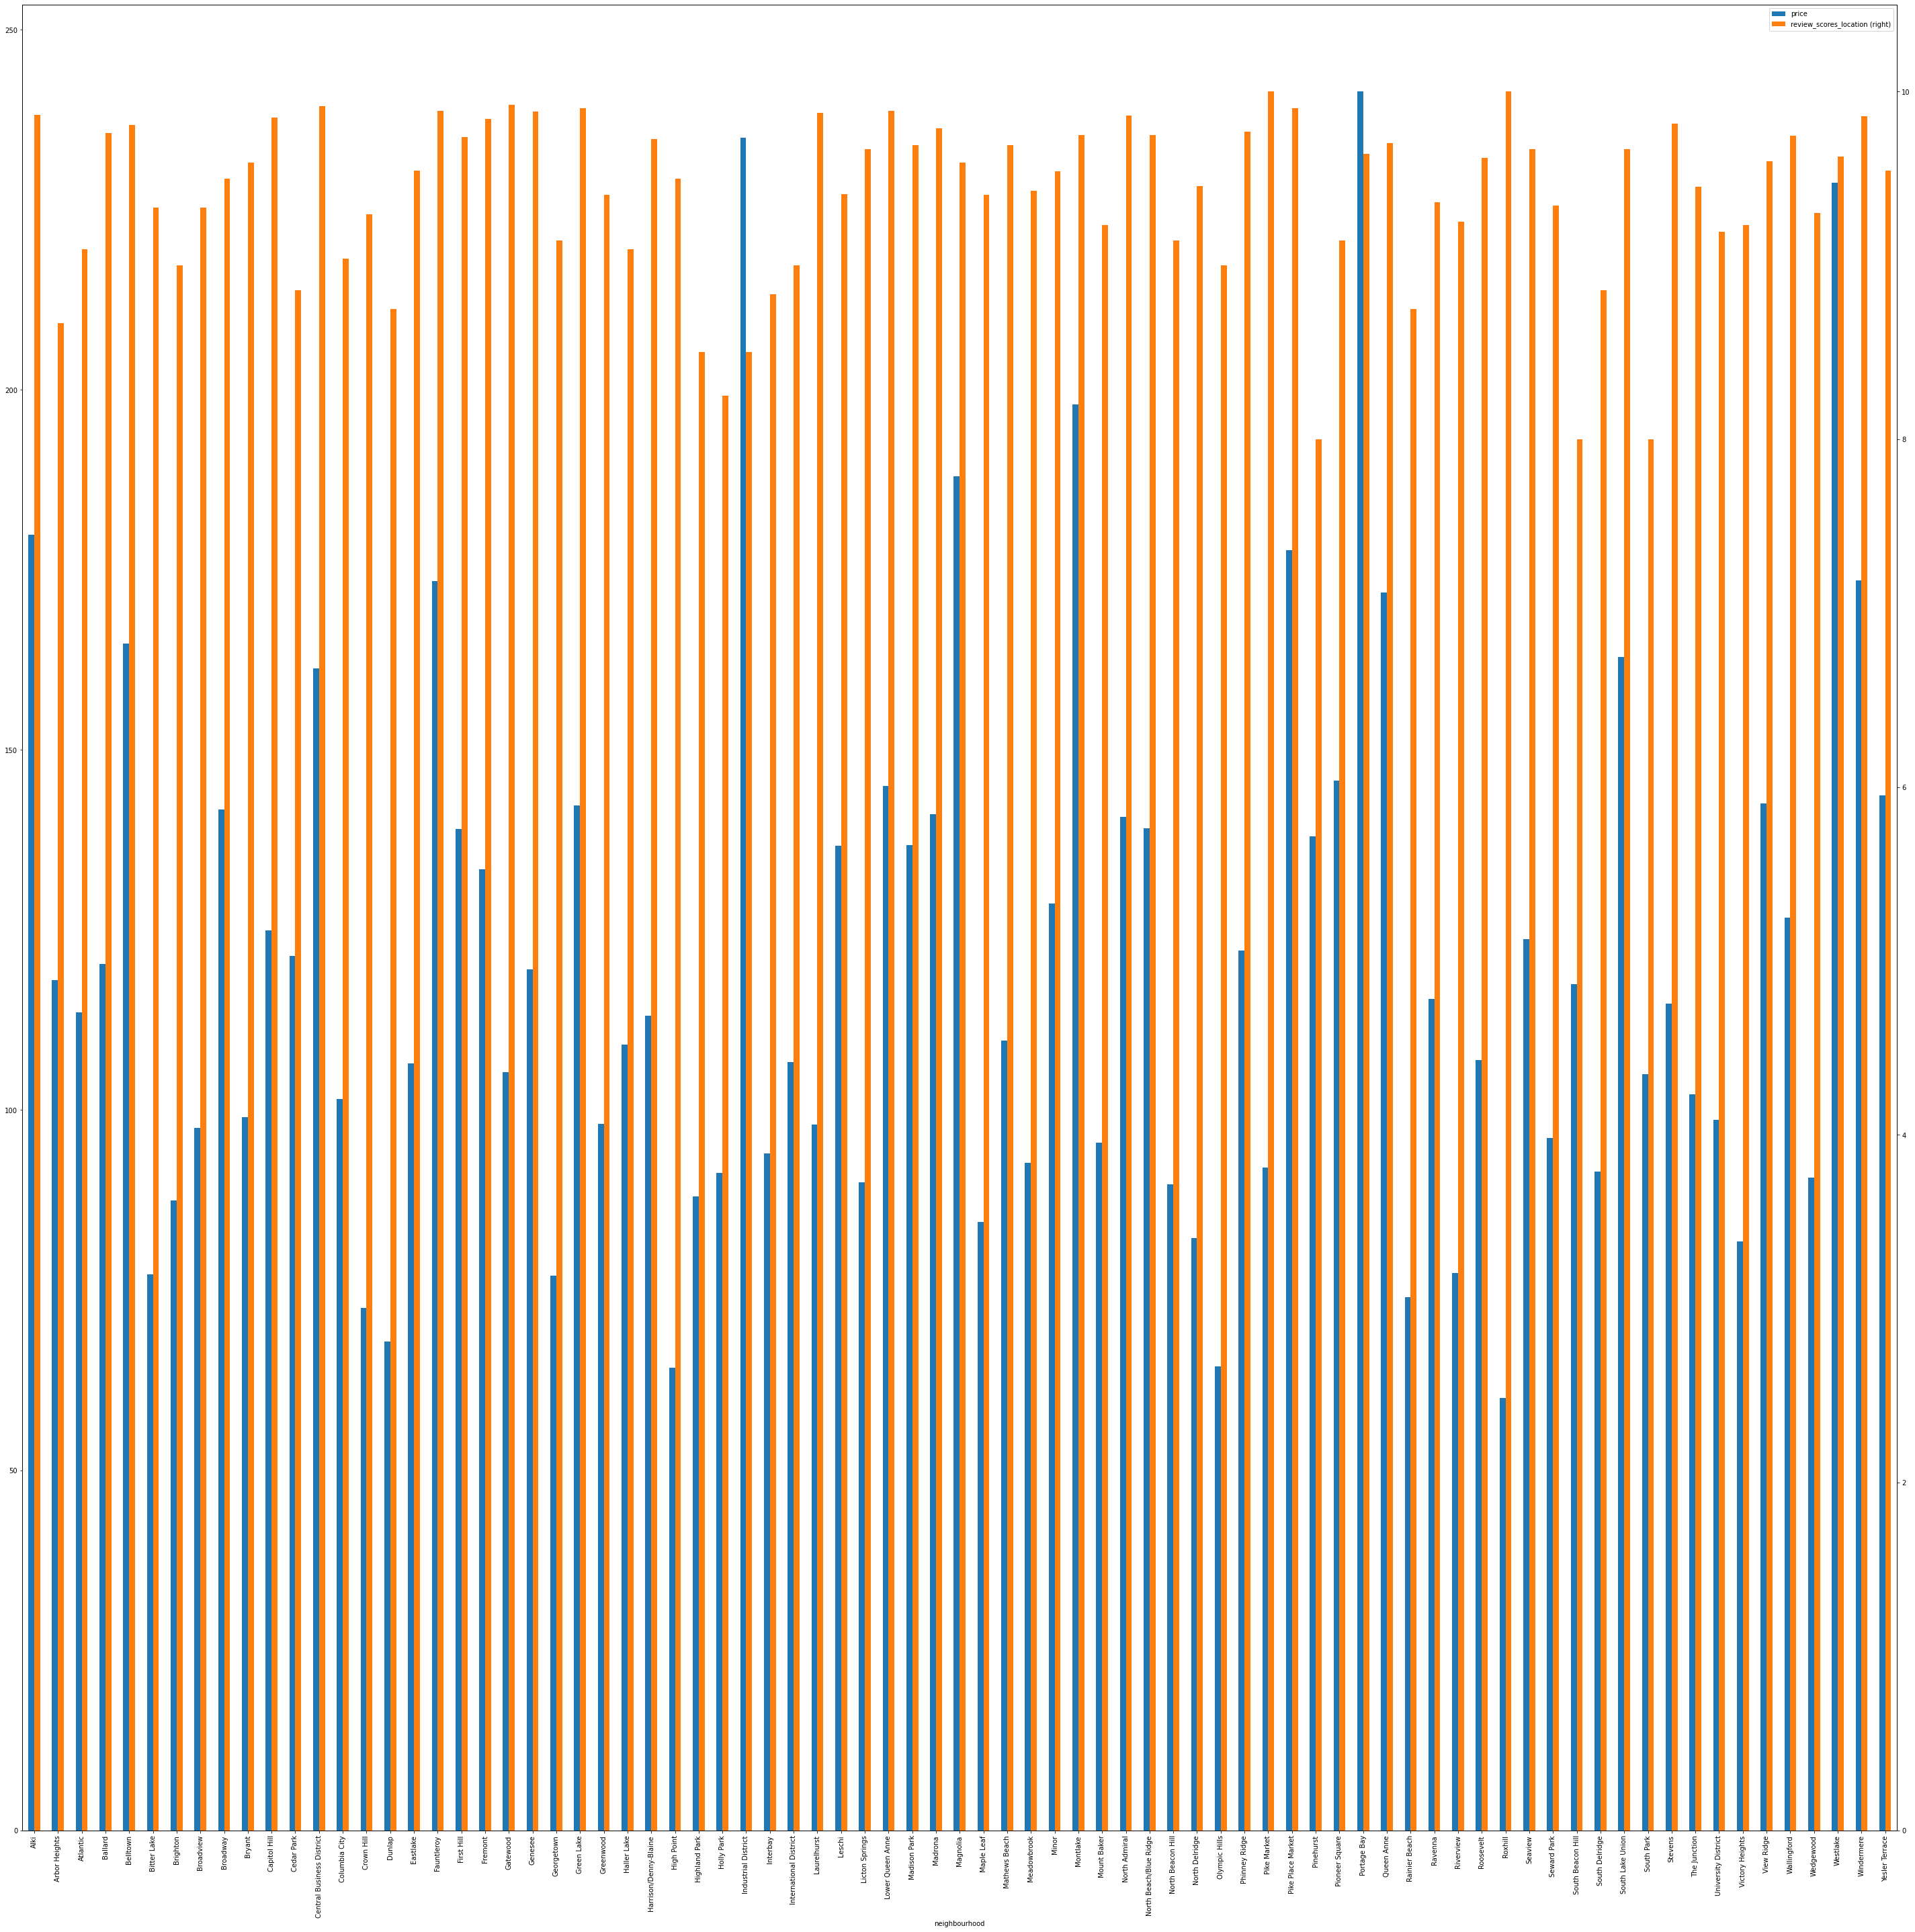

In [404]:
# Bar char of locations reviews and prices
best_2_rent.plot.bar(secondary_y='review_scores_location',rot=90, figsize=(50,50))

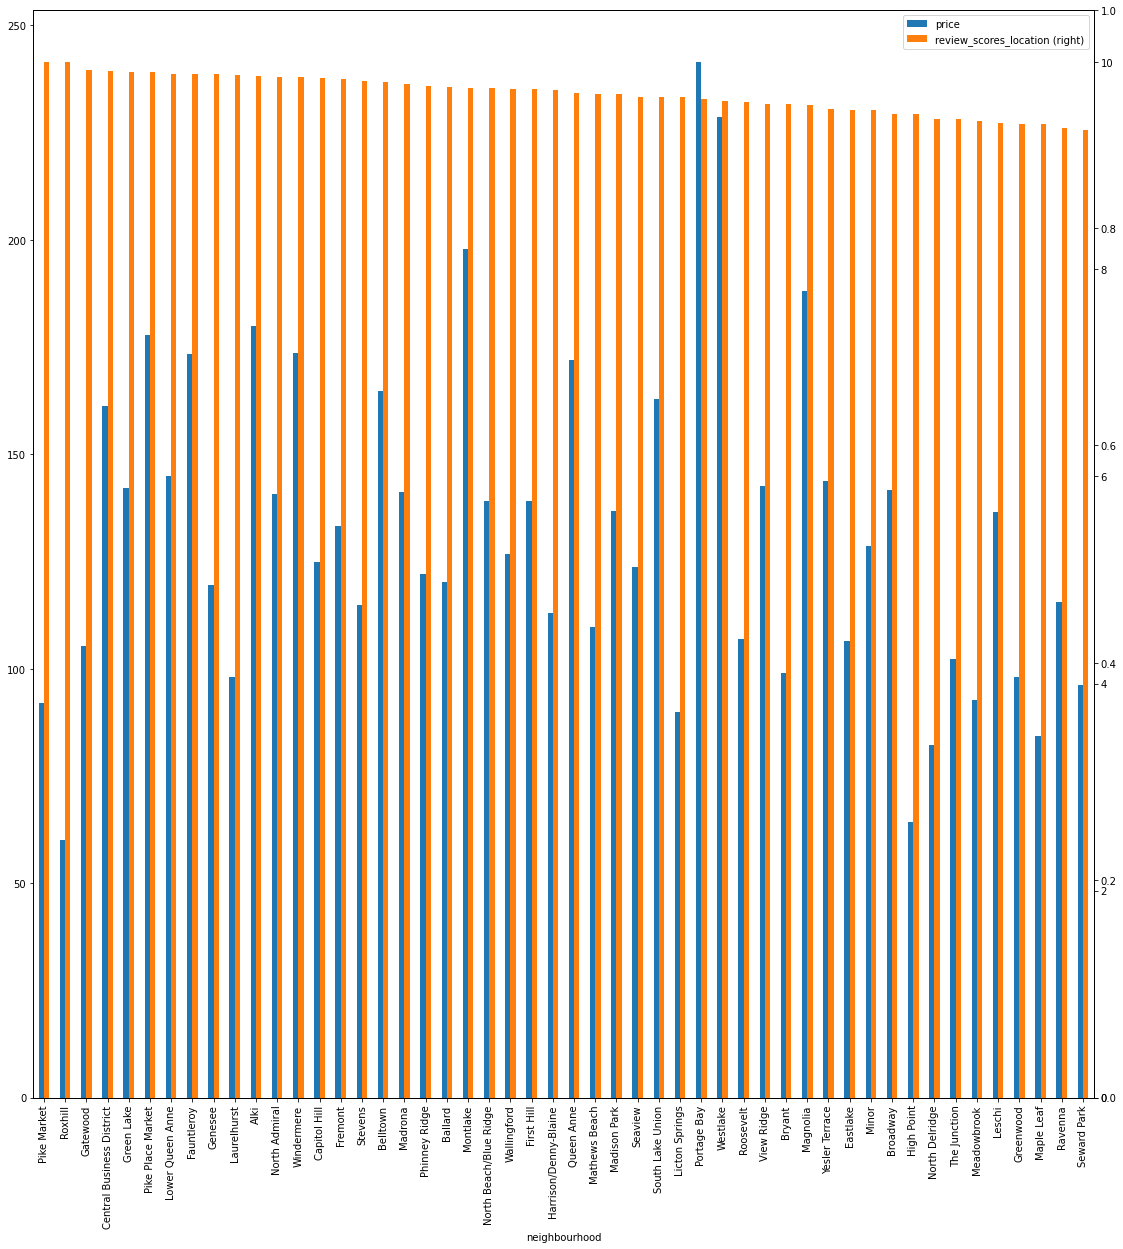

In [405]:
# Bar char of top 20 locations reviews and prices
ax = best_2_rent_top.plot.bar(secondary_y='review_scores_location', rot=90, figsize=(19,20))
ax2 = ax.twinx()

plt.show()

In [406]:

dr_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,7/19/2015,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,7/20/2015,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,7/26/2015,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,8/2/2015,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,8/10/2015,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,8/23/2015,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,9/1/2015,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,9/13/2015,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,9/21/2015,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,9/26/2015,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [407]:
dr_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [408]:
#Cdata wrangling

In [409]:
dc_calender.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,85.0


In [410]:
dc_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       934542 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB


In [411]:
# check duplicated values
dc_calender[dc_calender.duplicated()]

,listing_id,date,available,price


In [412]:
dc_calender.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [413]:
# convert date column type to date 
dc_calender['date'] = pd.to_datetime(dc_calender['date'])
# check
type(dc_calender.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# convert listing_id type to string
dc_calender['listing_id'] = dc_calender['listing_id'].astype(str)
# check
type(dc_calender.listing_id.iloc[0])

In [ ]:
# check
dc_calender.info()

In [ ]:
#Reviews_Dataset

In [ ]:
dr_reviews.head(10)

In [ ]:
# check duplicated values
dr_reviews[dr_reviews.duplicated()]

In [ ]:
dr_reviews.isnull().sum()

In [ ]:
dr_reviews.info()

In [ ]:
# convert listing_id type to string
dr_reviews['listing_id'] = dr_reviews['listing_id'].astype(str)
# check
type(dr_reviews.listing_id.iloc[0])

In [ ]:
# convert id type to string
dr_reviews['id'] = dr_reviews['id'].astype(str)
# check
type(dr_reviews.id.iloc[0])

In [ ]:
# convert date column type to date 
dr_reviews['date'] = pd.to_datetime(dr_reviews['date'])
# check
type(dr_reviews.date.iloc[0])

In [ ]:
# reomove null rows
dr_reviews.dropna(subset=['comments'], inplace=True)

In [ ]:
# check 
dr_reviews.info()

In [ ]:
#Listings_Dataset¶


In [ ]:
dl_listings.head(10)

In [ ]:
# take the important columns
dl_listings = dl_listings[['id','host_response_time','host_response_rate','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price'
,'cleaning_fee','extra_people','minimum_nights','review_scores_rating','instant_bookable']]

In [ ]:
dl_listings.info()

In [ ]:
# convert id type to string
dl_listings['id'] = dl_listings['id'].astype(str)
# check
type(dl_listings.id.iloc[0])

In [ ]:
# impute the nan value with mode
dl_listings.beds.fillna(dl_listings.beds.mode()[0], inplace=True)

# covert the beds to int
dl_listings['beds'] = dl_listings.beds.astype(int)

In [ ]:
# === price column === 

# replace the nan value in price to 0
dl_listings['price'].fillna(0, inplace=True)

# remove the symbols in price
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price
    
dl_listings['price'] = dl_listings.price.apply(remove_symbol)

# convert the price type to float
dl_listings['price'] = dl_listings['price'].astype(float)

In [ ]:
dl_listings.head()

In [ ]:
# check duplicated values
dl_listings[dl_listings.duplicated()]

In [ ]:
# covert percentage to float in host_response_rate column
def p2f(x):
    if type(x) is str:
        return float(x.strip('%'))/100
    return 1

dl_listings['host_response_rate'] = dl_listings.host_response_rate.apply(p2f)

In [ ]:
#Number of Columns and Rows¶

In [ ]:
print(f'Calendar has {dc_calender.shape[0]} rows and {dc_calender.shape[1]} columns')
print(f'Listings has {dl_listings.shape[0]} rows and {dl_listings.shape[1]} columns')
print(f'Reviews has {dr_reviews.shape[0]} rows and {dr_reviews.shape[1]} columns')
